In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("12-house_energy_regression.csv")

In [5]:
df.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [8]:
df.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


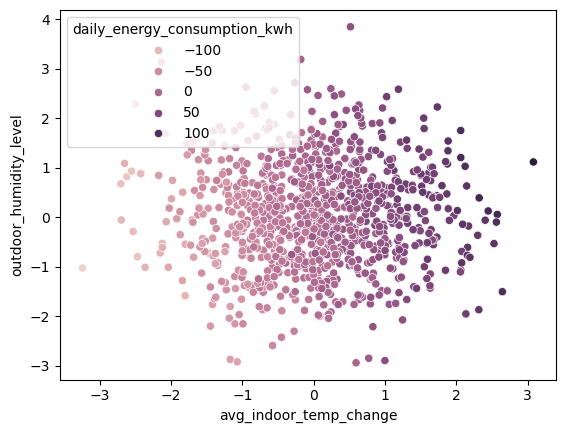

In [10]:
sns.scatterplot(x="avg_indoor_temp_change",y="outdoor_humidity_level",hue="daily_energy_consumption_kwh",data=df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop(columns="daily_energy_consumption_kwh")
y=df["daily_energy_consumption_kwh"]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=14)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
regressor=KNeighborsRegressor()

In [27]:
metrics={
    "n_neighbors":[3,5,7,9,11],
    "algorithm":['ball_tree', 'kd_tree'],
    "weights":['uniform', 'distance']
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid=GridSearchCV(estimator=regressor,param_grid=metrics)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [31]:
y_pred=grid.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [34]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9373771256186736
106.53694344538724
8.40554593198266
